sw: need to recollect the POI data sets

# Visualize POIs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
# import geoplot
import pickle
# import geoplot.crs as gcrs

/usr/local/lib/python3.7/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
# mount_path = "/mnt/c/Users/jason/Dropbox (MIT)/"
mount_path = "/Users/shenhaowang/Dropbox (MIT)/project_media_lab_South_Australia/"

In [8]:
# read files
# poi
poi = gpd.read_file(mount_path + "/SA data/dataSA/points/points.shp")

# read spatial files
sa2_adelaide = gpd.read_file('../../data_process/shapefiles/sa2_adelaide.shp')

# node degree entropy
with open('../../data_process/node_degree_entropy_df.pickle', 'rb') as f:
    node_degree_entropy_df = pickle.load(f) # this is a file processed from POI_df


In [9]:
# proj
sa2_adelaide_proj = sa2_adelaide.to_crs("epsg:3112")
poi_proj = poi.to_crs("epsg:3112")


In [6]:
node_degree_entropy_df.head()

,SA2_MAIN16,SA2_5DIG16,SA2_NAME16,SA3_CODE16,SA3_NAME16,SA4_CODE16,SA4_NAME16,GCC_CODE16,GCC_NAME16,STE_CODE16,...,sum_stay_duration_destination_entropy,total_stays_destination_entropy,num_nodes,num_1degree,num_2degree,num_3degree,num_4degree,num_greater5degree,poi_count,poi_count_entropy
0,401011001,41001,Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,3.949646,4.237396,1642,291,199,865,276,11,3288.0,2.487969
1,401011002,41002,North Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,3.152188,3.975034,517,149,54,239,69,6,756.0,2.246419
2,401021003,41003,Adelaide Hills,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,0.948900,2.042530,4034,1174,731,1982,141,6,0.0,0.000000
3,401021004,41004,Aldgate - Stirling,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,1.099284,2.075796,2455,710,502,1126,110,7,279.0,2.616117
4,401021005,41005,Hahndorf - Echunga,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,1.654530,2.549629,989,286,245,421,36,1,0.0,0.000000


In [7]:
sa2_adelaide.head()

,SA2_MAIN16,SA2_5DIG16,SA2_NAME16,SA3_CODE16,SA3_NAME16,SA4_CODE16,SA4_NAME16,GCC_CODE16,GCC_NAME16,STE_CODE16,STE_NAME16,AREASQKM16,geometry
0,401011001,41001,Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,10.4824,"POLYGON ((138.58096 -34.93024, 138.58094 -34.9..."
1,401011002,41002,North Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,5.0909,"POLYGON ((138.58214 -34.90424, 138.58287 -34.9..."
2,401021003,41003,Adelaide Hills,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,364.4390,"POLYGON ((138.75610 -34.82107, 138.75567 -34.8..."
3,401021004,41004,Aldgate - Stirling,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,117.2141,"POLYGON ((138.69440 -34.98807, 138.69514 -34.9..."
4,401021005,41005,Hahndorf - Echunga,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,110.1516,"POLYGON ((138.78877 -35.02474, 138.78889 -35.0..."


## POIs 

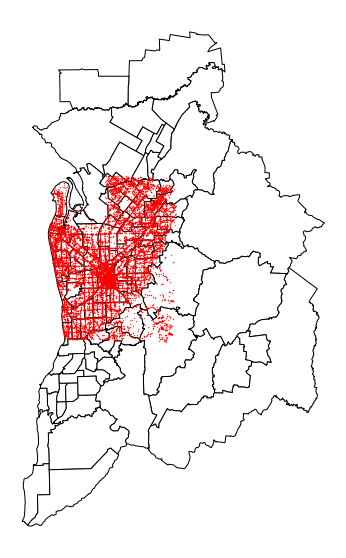

In [11]:
ax = sa2_adelaide_proj.plot(edgecolor='k', facecolor='w', figsize = (10,10))
poi_proj.plot(ax = ax, facecolor='r', markersize = 0.1)
ax.set_axis_off()

## POI Indicators

In [15]:
sa2_adelaide_proj = sa2_adelaide_proj.merge(node_degree_entropy_df[['poi_count','poi_count_entropy','SA2_MAIN16']], left_on='SA2_MAIN16', right_on='SA2_MAIN16', how='outer')

In [14]:
sa2_adelaide_proj

,SA2_MAIN16,SA2_5DIG16,SA2_NAME16,SA3_CODE16,SA3_NAME16,SA4_CODE16,SA4_NAME16,GCC_CODE16,GCC_NAME16,STE_CODE16,...,sum_stay_duration_destination_entropy,total_stays_destination_entropy,num_nodes,num_1degree,num_2degree,num_3degree,num_4degree,num_greater5degree,poi_count,poi_count_entropy
0,401011001,41001,Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,3.949646,4.237396,1642,291,199,865,276,11,3288.0,2.487969
1,401011002,41002,North Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,3.152188,3.975034,517,149,54,239,69,6,756.0,2.246419
2,401021003,41003,Adelaide Hills,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,0.948900,2.042530,4034,1174,731,1982,141,6,0.0,0.000000
3,401021004,41004,Aldgate - Stirling,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,1.099284,2.075796,2455,710,502,1126,110,7,279.0,2.616117
4,401021005,41005,Hahndorf - Echunga,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,1.654530,2.549629,989,286,245,421,36,1,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,404031105,41105,Fulham,40403,West Torrens,404,Adelaide - West,4GADE,Greater Adelaide,4,...,1.975506,2.784143,157,28,19,90,20,0,44.0,2.139979
99,404031106,41106,Lockleys,40403,West Torrens,404,Adelaide - West,4GADE,Greater Adelaide,4,...,1.416921,2.608267,530,102,39,308,81,0,129.0,1.991836
100,404031107,41107,Plympton,40403,West Torrens,404,Adelaide - West,4GADE,Greater Adelaide,4,...,1.695853,2.732940,1036,170,105,616,143,2,353.0,2.013120
101,404031108,41108,Richmond (SA),40403,West Torrens,404,Adelaide - West,4GADE,Greater Adelaide,4,...,2.308701,3.390496,887,125,120,410,231,1,334.0,2.342724


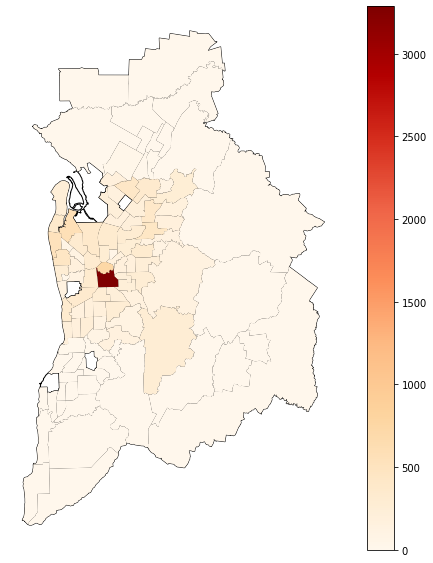

In [19]:
ax = sa2_adelaide_proj.plot(edgecolor='k', facecolor='w', figsize = (10,10))
sa2_adelaide_proj.plot(ax = ax, column = 'poi_count', cmap='OrRd', legend=True)
ax.set_axis_off()

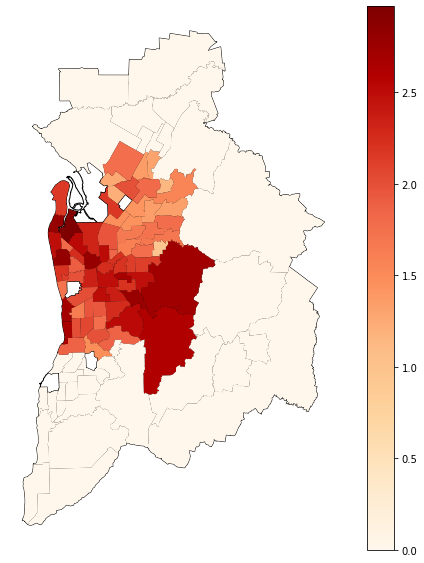

In [18]:
ax = sa2_adelaide_proj.plot(edgecolor='k', facecolor='w', figsize = (10,10))
sa2_adelaide_proj.plot(ax = ax, column = 'poi_count_entropy', cmap='OrRd', legend=True)
ax.set_axis_off()